# Pyber Ride Sharing

Analysis

* Fare costs skew higher in rural areas, however total rides are much lower (5.2%) compared to suburban (27.3%) and urban (67.5%) city types.

* Urban leads in terms of % total rides (67.5%), % of total fares (62%), and % of total drivers (77.8%).

* Suburban ranked in between urban and rural in terms of number of rides per city, with only one outlier city above 30 rides total (Port James = 32).

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Take in all of our ride sharing data and read it into pandas
ride_data = "ride_data.csv"
city_data = "city_data.csv"

ride_data_df = pd.read_csv(ride_data)
city_data_df = pd.read_csv(city_data)

In [3]:
# Merge the first two datasets on "City"
combined_data_df = pd.merge(ride_data_df, city_data_df, how="outer", on="city")
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [4]:
# Add total rides
combined_data_df["total_rides"] = 1
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type,total_rides
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban,1
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban,1
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban,1
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban,1
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban,1


In [5]:
# Total Number of Drivers Per City and City Type
total_drivers = combined_data_df.groupby(['city', 'driver_count', 'type'])
sum_drivers_df = total_drivers.sum()
sum_drivers_df.head()

,,,fare,ride_id,total_rides
city,driver_count,type,,,
Alvarezhaven,21,Urban,741.79,165899161874789,31
Alyssaberg,67,Urban,535.85,91953627077845,26
Anitamouth,16,Suburban,335.84,37762826439863,9
Antoniomouth,21,Urban,519.75,111909606921566,22
Aprilchester,49,Urban,417.65,86920968698689,19


In [6]:
sum_drivers_df["avg_fare"] = total_drivers["fare"].sum() / total_drivers["ride_id"].count() 
sum_drivers_df.head()

,,,fare,ride_id,total_rides,avg_fare
city,driver_count,type,,,,
Alvarezhaven,21,Urban,741.79,165899161874789,31,23.928710
Alyssaberg,67,Urban,535.85,91953627077845,26,20.609615
Anitamouth,16,Suburban,335.84,37762826439863,9,37.315556
Antoniomouth,21,Urban,519.75,111909606921566,22,23.625000
Aprilchester,49,Urban,417.65,86920968698689,19,21.981579


In [7]:
sum_drivers_df.head()

,,,fare,ride_id,total_rides,avg_fare
city,driver_count,type,,,,
Alvarezhaven,21,Urban,741.79,165899161874789,31,23.928710
Alyssaberg,67,Urban,535.85,91953627077845,26,20.609615
Anitamouth,16,Suburban,335.84,37762826439863,9,37.315556
Antoniomouth,21,Urban,519.75,111909606921566,22,23.625000
Aprilchester,49,Urban,417.65,86920968698689,19,21.981579


In [8]:
# Drop ride_id and fare columns
sum_drivers_df = sum_drivers_df.drop('ride_id', 1)
sum_drivers_df.head()

,,,fare,total_rides,avg_fare
city,driver_count,type,,,
Alvarezhaven,21,Urban,741.79,31,23.928710
Alyssaberg,67,Urban,535.85,26,20.609615
Anitamouth,16,Suburban,335.84,9,37.315556
Antoniomouth,21,Urban,519.75,22,23.625000
Aprilchester,49,Urban,417.65,19,21.981579


# Bubble Plot of Ride Sharing Data

In [9]:
final_df = sum_drivers_df.reset_index()

In [10]:
final_df.head()

,city,driver_count,type,fare,total_rides,avg_fare
0,Alvarezhaven,21,Urban,741.79,31,23.928710
1,Alyssaberg,67,Urban,535.85,26,20.609615
2,Anitamouth,16,Suburban,335.84,9,37.315556
3,Antoniomouth,21,Urban,519.75,22,23.625000
4,Aprilchester,49,Urban,417.65,19,21.981579


In [11]:
# Label Scatter Plot
x_lim = 50
x_axis = np.arange(0, x_lim, 1)
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.title('Pyber Ride Sharing Data (2016)')
s = 5*final_df["driver_count"]


# The y limits of our scatter plot is 0 to 55
plt.ylim(0, 55)

# The x limits of our scatter plot is 0 to 40
plt.xlim(0, 40)

(0, 40)

In [12]:
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
x = final_df.total_rides
y= final_df.avg_fare
a = plt.scatter(x, y, s=s, marker="o", color="green", edgecolors="black", alpha=0.75)
    

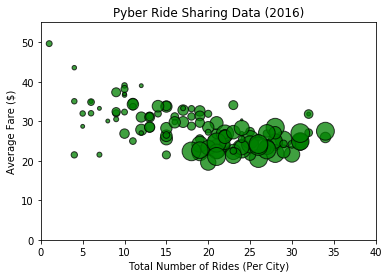

In [13]:
plt.show(a)

In [14]:
# create Urban dataframe
urban_df = final_df.loc[final_df.type=="Urban"]
urban_df.head()

,city,driver_count,type,fare,total_rides,avg_fare
0,Alvarezhaven,21,Urban,741.79,31,23.928710
1,Alyssaberg,67,Urban,535.85,26,20.609615
3,Antoniomouth,21,Urban,519.75,22,23.625000
4,Aprilchester,49,Urban,417.65,19,21.981579
5,Arnoldview,41,Urban,778.30,31,25.106452


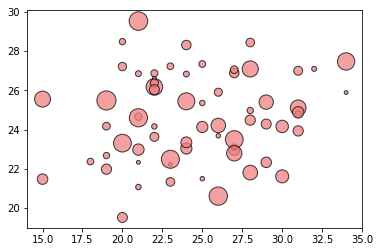

In [15]:
b = plt.scatter(urban_df.total_rides, urban_df.avg_fare, s=s, marker="o", color="lightcoral", edgecolors="black", alpha=0.75)
plt.show(b)

In [16]:
# create Rural dataframe
rural_df = final_df.loc[final_df.type=="Rural"]
rural_df.head()

,city,driver_count,type,fare,total_rides,avg_fare
17,East Leslie,9,Rural,370.27,11,33.660909
18,East Stephen,6,Rural,390.53,10,39.053000
19,East Troybury,3,Rural,232.71,7,33.244286
21,Erikport,3,Rural,240.35,8,30.043750
25,Hernandezshire,10,Rural,288.02,9,32.002222


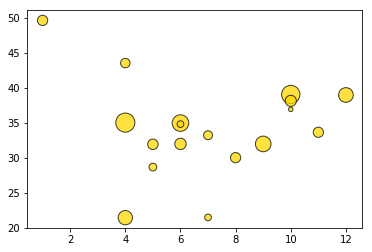

In [17]:
c = plt.scatter(rural_df.total_rides, rural_df.avg_fare, s=s, marker="o", color="gold", edgecolors="black", alpha=0.75)
plt.show(c)

In [18]:
suburban_df = final_df.loc[final_df.type=="Suburban"]
suburban_df.head()

,city,driver_count,type,fare,total_rides,avg_fare
2,Anitamouth,16,Suburban,335.84,9,37.315556
6,Campbellport,26,Suburban,505.67,15,33.711333
7,Carrollbury,4,Suburban,366.06,10,36.606000
9,Clarkstad,21,Suburban,372.62,12,31.051667
10,Conwaymouth,18,Suburban,380.51,11,34.591818


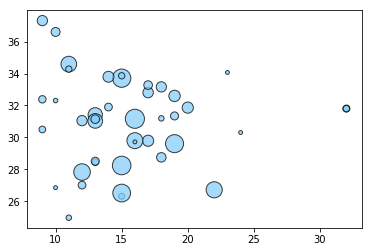

In [19]:
d = plt.scatter(suburban_df.total_rides, suburban_df.avg_fare, s=s, marker="o", color="lightskyblue", edgecolors="black", alpha=0.75)
plt.show(d)

In [20]:
# Analyze outlier city in Suburban
test = suburban_df.sort_values(['total_rides'], ascending=[False])
test.head(1)

,city,driver_count,type,fare,total_rides,avg_fare
73,Port James,15,Suburban,1017.81,32,31.806562


In [21]:
# Label Scatter Plot
x_lim = 50
x_axis = np.arange(0, x_lim, 1)
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.title('Pyber Ride Sharing Data (2016)')
s = 5*final_df["driver_count"]

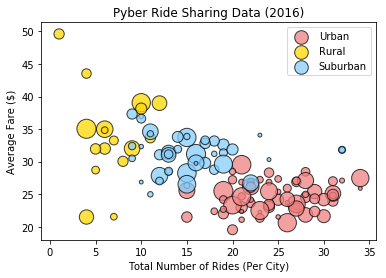

In [22]:
b = plt.scatter(urban_df.total_rides, urban_df.avg_fare, s=s, marker="o", color="lightcoral", edgecolors="black", alpha=0.75, label="Urban")
c = plt.scatter(rural_df.total_rides, rural_df.avg_fare, s=s, marker="o", color="gold", edgecolors="black", alpha=0.75, label="Rural")
d = plt.scatter(suburban_df.total_rides, suburban_df.avg_fare, s=s, marker="o", color="lightskyblue", edgecolors="black", alpha=0.75, label="Suburban")

# Create a legend for our chart
plt.legend(handles=[b, c, d], loc="best")

# Show the chart
plt.show()

In [23]:
final_df.head()

,city,driver_count,type,fare,total_rides,avg_fare
0,Alvarezhaven,21,Urban,741.79,31,23.928710
1,Alyssaberg,67,Urban,535.85,26,20.609615
2,Anitamouth,16,Suburban,335.84,9,37.315556
3,Antoniomouth,21,Urban,519.75,22,23.625000
4,Aprilchester,49,Urban,417.65,19,21.981579


In [24]:
# Create city type group
type_group = final_df.groupby('type')
type_group

In [25]:
# Isolate fares
fare_type = type_group['fare'].sum()
fare_type

type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

In [26]:
# Add data to fare pie chart

City_Type = ["Rural", "Suburban", "Urban"]
Fare = [4255.09, 20335.69, 40078.34]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.05)

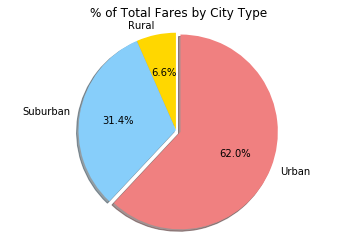

In [27]:
# Add labels to fare pie chart

plt.title("% of Total Fares by City Type")
plt.pie(Fare, explode=explode, labels=City_Type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [28]:
# Isolate rides
rides_type = type_group['total_rides'].sum()
rides_type

type
Rural        125
Suburban     657
Urban       1625
Name: total_rides, dtype: int64

In [29]:
# Add data to rides pie chart

City_Type = ["Rural", "Suburban", "Urban"]
Rides = [125, 657, 1625]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.05)

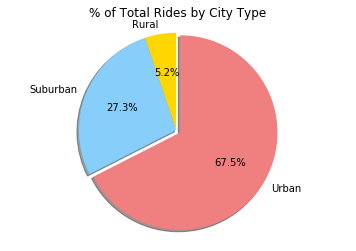

In [30]:
# Add labels to rides pie chart

plt.title("% of Total Rides by City Type")
plt.pie(Rides, explode=explode, labels=City_Type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [31]:
# Isolate drivers
drivers_type = type_group['driver_count'].sum()
drivers_type

type
Rural        104
Suburban     638
Urban       2607
Name: driver_count, dtype: int64

In [32]:
# Add data to drivers pie chart

City_Type = ["Rural", "Suburban", "Urban"]
Drivers = [104, 638, 2607]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.05)

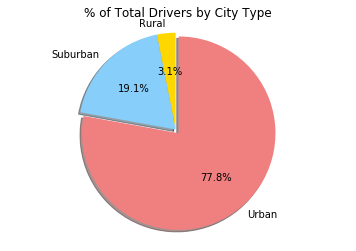

In [33]:
# Add labels to drivers pie chart

plt.title("% of Total Drivers by City Type")
plt.pie(Drivers, explode=explode, labels=City_Type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()